# Recitation problems

 Exam 2 Coverage: see announcement in elearning.

# Import all necessary libraries and magics



In [38]:
import numpy as np
import numpy.random as npr
import random
import itertools

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

import scipy.stats as stats

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all lecture slides, recommended reading materials, and jupyter notebooks.

2.  lecture recording:
https://docs.google.com/spreadsheets/d/1fqHnb4pW51ZKJQKNhJQsgftsrFOLpSfcXvqdVnSzp_U/edit?gid=0#gid=0

  
3. Review/redo exercises from HWs.

4. Solve practice problems provided in the recitation class.

## Additional problem sets from online resources

1. Discrete random variables: https://www.probabilitycourse.com/chapter3/3_3_0_chapter3_problems.php

2. Continous random variables: https://www.probabilitycourse.com/chapter4/4_4_0_chapter4_problems.php

3. Central limit theorem:  https://mathcenter.oxford.emory.edu/site/math117/probSetCentralLimitTheorem/

**If you encounter any question that you think worth discussing in class, please let me know on slack.**

In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


- Random Variables

You will be given the following tables with your exam:


In [ ]:

from IPython.display import Image
Image('Discrete RVs.png',width=600)

In [ ]:

from IPython.display import Image
Image('Continuous RVs.png',width=600)

# MAP, MLE 

# Question:
There are two coins: one is normal and another is biased with probability of heads to be 0.6. When selecting a coin from a set of coins, the probability that is normal is 0.95 and the probability that the coin is biased is 0.05.

We select one coin at random and fliped it 100 times. There are 55 heads being observed.

- Compute a MLE decision rule that determine if the coin is fair or biased

- Compute a MAP decision rule that determine if the coin is fair or biased.

In [5]:
coin0 = stats.bernoulli(0.5)
coin1 = stats.bernoulli(0.6)

In [6]:
n= 100

coin0s100 = stats.binom(100, 0.5)
coin1s100 = stats.binom(100, 0.6)


In [7]:
def MLE_COIN(k):
    
    coin0s100 = stats.binom(100, 0.5)
    coin1s100 = stats.binom(100, 0.6)

    pcoin0 = coin0s100.pmf(k)
    pcoin1 = coin1s100.pmf(k)
    if pcoin0> pcoin1:
        return 0 
    else:
        return 1

In [37]:
prior = [0.95,0.05]
def MAP_COIN(k,prior):
    
    coin0s100 = stats.binom(100, 0.5)
    coin1s100 = stats.binom(100, 0.6)

    pcoin0scaled = coin0s100.pmf(k)*prior[0] # the P(coin0|#heads) is proportional to P(#heads|coin0)*PriorProbability(coin0)
    pcoin1scaled = coin1s100.pmf(k)*prior[1] # the P(coin1|#heads) is proportional to P(#heads|coin1)*PriorProbability(coin1)
    if pcoin0scaled> pcoin1scaled:
        return 0 
    else:
        return 1

In [17]:
print("The MLE RULE given 55 heads determines ", MLE_COIN(55) )

The MLE RULE given 55 heads determines  1


In [18]:
print("The MAP RULE given 55 heads determines ", MAP_COIN(55, prior) )

The MAP RULE given 55 heads determines  0


# Question DECISIONRULE-2

A box contains a fair coin and three biased coin (each with probability of heads =0.2). A coin is randomly selected from the box and tossed 10 times. 

- If 4 heads are observed, what is the posterior of $H_0$: The selected coin is fair, and $H_1$: The selected coin is biased.

- If the decision rule is to always choose $H_0$ when more than $4$ (inclusive) heads are observed, what is the probability of the error?

- If the decision rule is to always choose $H_0$ when more than $k^\ast$ (inclusive) heads are observed, how to select the $k^\ast$ that minimizes the probability of error?  


- implement in python to compute the probability of the error for the following decision rules: selects $H_0$ when more than $k$ inclusive heads are observed, for $k=0,1,\ldots, 10$.

In [57]:
# this problem is simular to the previous one
n= 10

coin0s10 = stats.binom(10, 0.5) # fair coin
coin1s10 = stats.binom(10, 0.2) # biased coin

prior0 = [0.25, 0.75] # the prior probability distribution, there are total 4 coins, a fair and three biased.



In [59]:
# 1. 
def posterior(k, prior):
    # the posterior probability p_fair, p_biased given the observation and prior,
    # k- the number of observed heads
    

    coin0s10 = stats.binom(10, 0.5) # fair coin
    coin1s10 = stats.binom(10, 0.2) # biased coin
    pcoin0scaled = coin0s10.pmf(k)*prior[0] # the P(coin0|#heads) is proportional to P(#heads|coin0)*PriorProbability(coin0)
    pcoin1scaled = coin1s10.pmf(k)*prior[1] # the P(coin1|#heads) is proportional to P(#heads|coin1)*PriorProbability(coin1)
    pheads = pcoin0scaled + pcoin1scaled 
    posterior = [pcoin0scaled/pheads, 1- pcoin0scaled/pheads]
    return posterior

[P0_4heads, P1_4heads] = posterior(4, prior0)
print("the probability of H0 after 4 heads is", P0_4heads )
print("the probability of H1 after 4 heads is", P1_4heads )

the probability of H0 after 4 heads is 0.4369693192892225
the probability of H1 after 4 heads is 0.5630306807107774


In [69]:
def alwaysH0(num_heads, k):
    if num_heads >= k:
        return 0
    else:
        return 1
    
def probErr(decision_rule, k, prior):
    # use simulation, the error event occur when the underlying true model is different from the decision:
    count = 0 # counting error events
    num_sims = 10_000
    coin0s10 = stats.binom(10, 0.5) # fair coin
    coin1s10 = stats.binom(10, 0.2) # biased coin
    for sim in range(num_sims):
        selectcoin = np.random.choice([0,1], p= prior) #0:H0 and 1:H1
        if selectcoin == 0:
            num_heads = coin0s10.rvs()
        else:
            num_heads = coin1s10.rvs()
        decision = decision_rule(num_heads, k)
        if decision != selectcoin:
            count += 1 # the decision is different from the true coin being selected. error event count +1
    return count/num_sims

p_err4 = probErr(alwaysH0, 4, prior0)
print("the probability of error to always choose $H_0$ when more than $4$ heads: ", p_err4 )

the probability of error to always choose $H_0$ when more than $4$ heads:  0.1368


In [71]:
# Calculate the probability of error for each k
p_err = [probErr(alwaysH0, k, prior0) for k in range(11)]
p_err

[0.7497,
 0.6735,
 0.4675,
 0.2575,
 0.1345,
 0.1234,
 0.1612,
 0.215,
 0.2378,
 0.2512,
 0.2576]

In [80]:
optimal_k = np.argmin(p_err) # find the index of the array that has the minimal value.
p_err_min = p_err[optimal_k] # return the minimal error probability of that given k^\ast.
print('the $k^\ast$ is: ',optimal_k)
print("the minimal probability of error given $k^*$: ", p_err_min)

the $k^st$ is:  5
the minimal probability of error given $k^*$:  0.1234


In [85]:
# from analytical analysis
p_err_a = np.zeros(11)
for k in range(11):
    p_decideH0_H1 =  1- coin1s10.cdf(k-1)  
    p_decideH1_H0 =  coin0s10.cdf(k-1) 
    p_err_a[k] = p_decideH0_H1*prior0[1]+ p_decideH1_H0*prior0[0]
     
print("the analytical error probability for k=0,...10:", p_err_a) #

the analytical error probability for k=0,...10: [0.75       0.6697135  0.47082832 0.25532223 0.13362416 0.1188334
 0.16053876 0.20767952 0.23638657 0.2473176  0.24975594]


# Discrete Random Variables

## Question  (Discrete RV)

Let $X$ be a random variable defined by the probability mass function 

$$
X = \begin{cases}
-2 & \text{ with probability 1/3}\\
1 & \text{ with probability 1/2}\\
-1 & \text{ with probability 1/6}.
\end{cases} 
$$
find 

(a) $E (X)$;

(b) $E(X^2)$;

(c) $Var(X)$;

(d) $E(2X+5)$;

(e) $E(3X^2+6)$;

 ## Question  (Discrete RV)

Let $X$
 be the number of the cars being repaired at a repair shop. We have the following information:

At any time, there are at most $3$
 cars being repaired.
The probability of having 2
 cars at the shop is the same as the probability of having one car.
The probability of having no car at the shop is the same as the probability of having 3
 cars.
The probability of having 1
 or 2
 cars is half of the probability of having 0
 or 3
 cars.
Find the PMF of $X$.

## Question  (Discrete RV)


Roll of two 6-faced dice, let $X$ and $Y$ be the number observed. Let $Z = X - Y$. Compute the PMF of $Z$. Implement a python function to calculate $P_Z(Z=k)$ for the values of $k$s that the probability is not zero.

## Question 4 (Continuous RV)
Let $X$  be a uniform(0,1) random variable, and let $Y = \exp(-X)$.

Use simulation to compute the expectation of $Y$.


In [81]:
X= stats.uniform(loc=0, scale =1)
num_sims =100_00

def getY(x):
    return np.exp(x)

Xval = X.rvs(num_sims)
Yval = getY(Xval)
expect_Yval = np.sum(Yval)/num_sims
  
print("The sample approximation for the expected value of Y",expect_Yval ) 

The sample approximation for the expected value of Y 1.7204687764137867


## Question 5

(use analytical calcuation and then verify your answer in python)

 
Let a Gaussian RV $X\sim N(\mu=2, \sigma^2=16)$ 

1. Find the probability that $X$ is greater than 5.

2. Find the probability that $X$ is less than 1.25

3. Find the constant $c$ such that $P(X<c)=0.6$.


https://www.mathsisfun.com/data/standard-normal-distribution-table.html

In [27]:
G = stats.norm(loc=2, scale = 4)
#1 
p1 = G.sf(5)
p1

0.2266273523768682

In [28]:
p2 = G.cdf(1.25)
p2

0.4256343118441028

In [26]:
c = G.isf(1-.6) # the probability that P(X>c) = 1-0.6=0.4
c 

3.0133884125431987

## Question 6

The random variable $X$ has a unknown distribution.

The following data is collected by sampling from X. Provide an estimator for the mean and an unbiased estimator for the variance of $X$ using the sample.

In [30]:
samples = np.array([66, 67, 62, 75, 76, 78, 68, 73, 67, 60, 67, 72, 68, 73, 68, 67, 65,
       73, 67, 62, 70, 71, 72, 71, 67, 78, 72, 72, 65, 66, 72, 78, 69, 68,
       68, 66, 71, 71, 74, 66, 68, 76, 63, 75, 71, 77, 62, 74, 71, 63])

In [31]:
mu = samples.mean()
mu

69.62

In [36]:
var = samples.var(ddof=1)
var

20.8934693877551

___

## Question 7

Let $X$ be uniformly distriubuted in $-5\le x\le 5$.

Find the probability of

(a) $P(X<1)$;

(b) $P(|X-1|\ge 2)$;

___

# Central limit theorem

## Question (CLT) - 1

The number of accidents in a certain city is modeled by a Poisson random variable with an average rate of 10
 accidents per day. Suppose that the number of accidents on different days are independent. Use the central limit theorem to find the probability that there will be more than 3800
 accidents in a certain year. Assume that there are 365
 days in a year.



## Question (CLT) -2 

In a communication system, each codeword consists of 1000
 bits. Due to the noise, each bit may be received in error with probability 0.1
. It is assumed bit errors occur independently. Since error correcting codes are used in this system, each codeword can be decoded reliably if there are less than or equal to 125
 errors in the received codeword, otherwise the decoding fails. Using the CLT, find the probability of decoding failure.

Compute the analytical result and then use python to implement a simulation to calcuate the probability of decoding failure. 


## Question (CLT) -3

You have a fair coin. You toss the coin n
 times. Let $X$
 be the portion of times that you observe heads. How large n
 has to be so that you are $95\%$
 sure that $0.45≤X≤0.55$
? In other words, how large $n$
 has to be so that $P(0.45≤X≤0.55)> 95\%$?
 
 


## Question (clt)-4



A manufacturer of a patent medicine claims that it was 90\% effective in relieving an allergy  for 24 hours. In a sample of 100 people who had the allergy, the medicine provides relief for 80 people.

Determine if the company's claim is legitimate given 0.01 as the level of significance.



In [86]:
G0 = stats.norm()
G0.cdf(-3.33)

0.0004342299203816554

# Property of variance and mean

## Question   12

Let $X_1,\ldots X_n$ be denote the independent, identically distributed, random variables for a random sample of size $n$. The distribution of $X_i$ has a mean $\mu_1$ and std $\sigma_1$.

Let $Y_1,\ldots Y_m$ be denote the independent, identically distributed, random variables for a random sample of size $m$. The distribution of $Y_i$ has a mean $\mu_2$ and std $\sigma_2$.


 
Derive the mean and variance of 

* $X_1+X_2+\ldots +X_n -( Y_1 + Y_2 + \ldots + Y_m)$.

* $\bar X - \bar Y$ where $\bar X = \frac{X_1+X_2+\ldots +X_n}{n}$ and $\bar Y = \frac{Y_1+Y_2+\ldots +Y_m}{m}$. RV)


# Part 2, programming exercise


# 1  

A machine produces a mechanical component. It is informed on the machine that the probability of a component being defective is $0.01$. Consider a batch of $1000$ components produced by the machine.  Let $\rho$ be the number of defective components in the 1000 components batch. A worker took out two components from the 1000 components and tested these. 

 (10 points) Plot the probability mass function of $\rho$ given the observation that both components are defective.

Hint: the key is to compute the conditional probability: Given $\rho$ out of $n$ components are defective, what is the probability that two components taken from the batch are both defective? Use sequential model to solve this question. 

In [88]:
X = stats.bernoulli(0.01) 

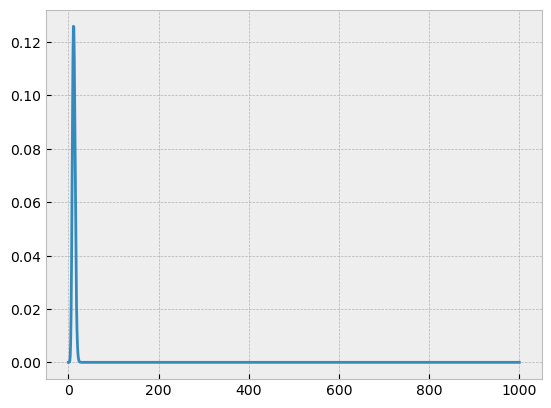

In [102]:
def take2(rho,n):
    return rho/n*((rho-1)/n)

def posterior_rho(n):
    defective = stats.binom(n, 0.01)
    p_rho_take_2_scaled= np.zeros(n)
    for rho in range(n):
        p_rho = defective.pmf(rho) # the probability of rho defective in n items
        p_take2_rho = take2(rho,n)
        p_rho_take_2_scaled[rho] = p_take2_rho*p_rho
    p_rho_take2 = p_rho_take_2_scaled/np.sum(p_rho_take_2_scaled)
    return p_rho_take2
n=1000
p_rho_take2 = posterior_rho(n)
xline = np.linspace(0,n,n)
plt.plot(xline, p_rho_take2)


intuitively, if the sample rho is small, then the probability of observing two defectives will be higher from the rho items. If the sample rho is large, then due to defective rate 0.01, the probability of sampling two defective from rho items becomes very small.

#  2


A box contains two fair coin and four biased coin (each with probability of heads =0.7). A coin is randomly selected from the box and tossed 10 times. 


1. Let $k$ be the observed heads in the 10 tosse. write a MLE decision rule that take the input $k$ and output 0: deciding that  a fair coin is selected; and 1: deciding that a biased coin is selected.

2. Let $k$ be the observed heads in the 10 tosse. write a MAP decision rule that take the input $k$ and output 0: deciding that  a fair coin is selected; and 1: deciding that a biased coin is selected.

3. use simulation to compute the probability of error in the above MLE and MAP decision rules. 


In [103]:
#this is the similar problems to question map-mle section, omitted for now